In [58]:
import pandas as df
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift

In [2]:
# All Data is based on Official releases by WHO
coronaData = df.read_csv("CoronaData.csv")

In [33]:
# The point of this analysis is to take a stats approach to the Coronavirus
coronaData

,Unnamed: 0,Global Confirmed,China Confirmed,China Suspected,China Severe,China Deaths,Outside Confirmed,Outside Countries
0,1,282,278,NaN,NaN,NaN,4,3
1,2,314,309,NaN,NaN,NaN,4,3
2,3,581,571,NaN,NaN,NaN,10,4
3,4,846,830,NaN,NaN,NaN,16,6
4,5,1320,1297,NaN,NaN,NaN,23,9
5,6,2014,1985,NaN,NaN,NaN,29,10
6,7,2798,2741,5794.0,461.0,80.0,37,11
7,8,4593,4537,6973.0,976.0,106.0,56,14
8,9,6065,5997,9239.0,1239.0,132.0,68,15
9,10,7818,7736,12167.0,1370.0,170.0,82,18


In [35]:
# Taking a look at the confirmed cases over time
globalConfirmed = coronaData['Global Confirmed']
chinaConfirmed = coronaData['China Confirmed']
outsideConfirmed = coronaData['Outside Confirmed']
chinaDeaths = coronaData['China Deaths']

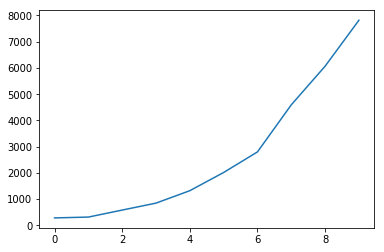

In [26]:
plt.plot(globalConfirmed)
# A line graph of globally confirmed cases over time

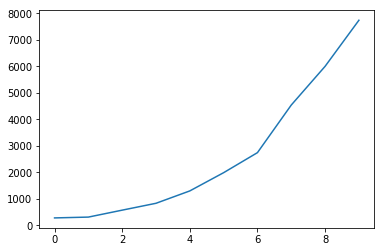

In [27]:
plt.plot(chinaConfirmed)
# A line graph of china confirmed cases over time

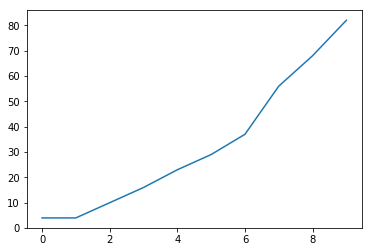

In [28]:
plt.plot(outsideConfirmed)
# A line graph of all other country confirmed cases over time

Mean: 0.014198761760260314
Median: 0.013704064199859069


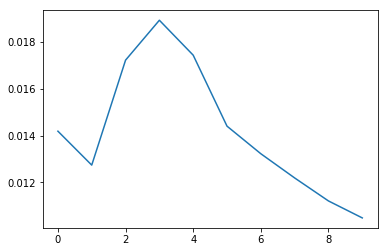

In [46]:
# Taking a look at percentage of percentage of confirmed cases outside of china
percentageNotChina = outsideConfirmed/globalConfirmed
plt.plot(percentageNotChina)
# It appears to be stabilizing at about 1.4 percent 
# We also see that the median and mean lies around this percent
print("Mean: " + str(np.mean(percentageNotChina)))
print("Median: " + str(np.median(percentageNotChina)))

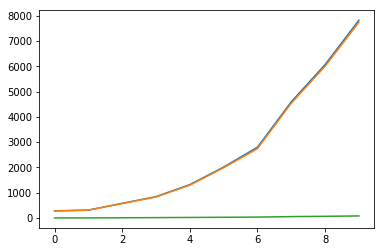

In [47]:
# Let's take a look at all confirmed cases plotted together
plt.plot(globalConfirmed)
plt.plot(chinaConfirmed)
plt.plot(outsideConfirmed)
# We can see that the total count is highly dependent 
# on the total Chinese Confirmed case
# At this stage it appears as though the number of cases increase exponentially

Mean: 0.024134017703469478
Median: 0.022687230765481924


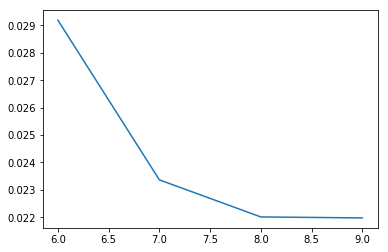

In [54]:
# Now let's take a look at mortality rates
# We only have data on confirmed case vs deaths in China for now
# So let's just use that
# This is total deaths vs confirmed cases
percentageDeath = chinaDeaths/chinaConfirmed
plt.plot(percentageDeath)
# We saw an exponential increase of confirmed caes previously
# We also see that the death per confirmed cases is dropping
# After cleaning up the values we have no data for we see
print("Mean: " + str(np.mean(percentageDeath[~np.isnan(percentageDeath)])))
print("Median: " + str(np.median(percentageDeath[~np.isnan(percentageDeath)])))
# So approximately 2.4% in death/confirmed case

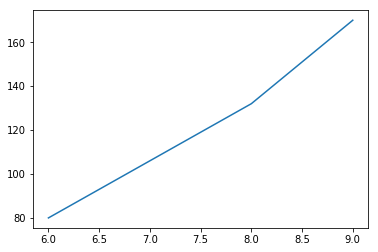

In [57]:
# Let's look at deaths in particular
plt.plot(chinaDeaths)
# We see that it scales linearly whereas confirmed cases scale exponential-like

In [83]:
# Let's say that the time doesn't match up 100%
# With out current data, let's shift death to match the earliest cases
shiftedChinaDeaths = chinaDeaths.shift(-6)

Mean: 0.2667011281283832
Median: 0.2594715821038441


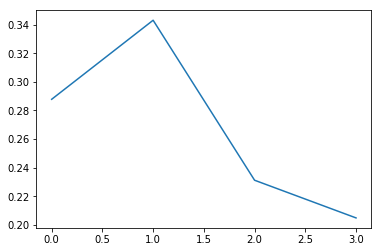

In [87]:
# Now let's evaluate death rates
shiftedDeathRates = shiftedChinaDeaths/chinaConfirmed
plt.plot(shiftedDeathRates)
# We see that the rate is a lot higher, however, very unstable and shouldnt be used
# Especially as it appears to still be dropping as time increases
# There still isn't enough data for accurate calculation
print("Mean: " + str(np.mean(shiftedDeathRates[~np.isnan(shiftedDeathRates)])))
print("Median: " + str(np.median(shiftedDeathRates[~np.isnan(shiftedDeathRates)])))

In [88]:
# And that's the analysis as of January 30th